In [1]:
import pandas as pd

# Load the SNLI test data (including true labels)
snli_test_path = "/kaggle/input/stanford-natural-language-inference-corpus/snli_1.0_test.csv"
snli_test_df = pd.read_csv(snli_test_path)

# Define file paths for SNLI prediction files
snli_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_snli_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_snli_predictions.csv",
    "albert": "/kaggle/input/albert/albert_snli_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_snli = "/kaggle/working/combined_snli_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_snli_df = pd.DataFrame(columns=columns)

label_mapping = {'entailment': 0, 'neutral': 1, 'contradiction': 2}

# Load and merge the predictions
for model, path in snli_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_snli_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_snli_df['True_Label'] = snli_test_df['gold_label'].map(label_mapping)

# Convert True_Label to integer type
combined_snli_df['True_Label'] = combined_snli_df['True_Label'].astype('Int64')

# Save the combined DataFrame to CSV
combined_snli_df.to_csv(output_csv_path_snli, index=False)

print(f"Combined SNLI predictions with true labels saved to {output_csv_path_snli}")


Combined SNLI predictions with true labels saved to /kaggle/working/combined_snli_df


In [2]:
combined_snli_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0


In [3]:
# Load the ANLI Round 1 test data (including true labels)
mnli_matched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_matched.csv"
mnli_matched_test_df = pd.read_csv(mnli_matched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_matched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_matched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_matched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_matched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_matched = "/kaggle/working/combined_mnli_matched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_matched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_matched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_matched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_matched_df['True_Label'] = mnli_matched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_matched_df.to_csv(output_csv_path_mnli_matched, index=False)

print(f"Combined MNLI-matched predictions with true labels saved to {output_csv_path_mnli_matched}")


Combined MNLI-matched predictions with true labels saved to /kaggle/working/combined_mnli_matched_df


In [4]:
combined_mnli_matched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005164,0.993364,0.001472,0.017844,0.950246,0.031909,0.010844,0.983012,0.006144,1
1,0.999153,0.000526,0.000321,0.001413,0.002030,0.996557,0.005388,0.007536,0.987076,2
2,0.000989,0.044792,0.954219,0.954781,0.042249,0.002970,0.853862,0.143483,0.002655,0
3,0.994965,0.004808,0.000228,0.000343,0.003511,0.996146,0.004128,0.070757,0.925115,2
4,0.999657,0.000220,0.000123,0.000079,0.000496,0.999425,0.003864,0.029262,0.966875,2


In [5]:
# Load the ANLI Round 1 test data (including true labels)
mnli_mismatched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_mismatched.csv"
mnli_mismatched_test_df = pd.read_csv(mnli_mismatched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_mismatched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_mismatched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_mismatched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_mismatched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_mismatched = "/kaggle/working/combined_mnli_mismatched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_mismatched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_mismatched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_mismatched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_mismatched_df['True_Label'] = mnli_mismatched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_mismatched_df.to_csv(output_csv_path_mnli_mismatched, index=False)

print(f"Combined MNLI-mismatched predictions with true labels saved to {output_csv_path_mnli_mismatched}")


Combined MNLI-mismatched predictions with true labels saved to /kaggle/working/combined_mnli_mismatched_df


In [6]:
combined_mnli_mismatched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0


In [7]:
# Load the ANLI Round 1 test data (including true labels)
anli_r1_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r1.csv"
anli_r1_test_df = pd.read_csv(anli_r1_test_path)

# Define file paths for ANLI Round 1 prediction files
anli_r1_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r1_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r1_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r1_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r1 = "/kaggle/working/combined_anli_r1_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r1_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r1_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r1_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r1_df['True_Label'] = anli_r1_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r1_df.to_csv(output_csv_path_anli_r1, index=False)

print(f"Combined ANLI Round 1 predictions with true labels saved to {output_csv_path_anli_r1}")


Combined ANLI Round 1 predictions with true labels saved to /kaggle/working/combined_anli_r1_df


In [8]:
combined_anli_r1_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.015388,0.976305,0.008307,0.996714,0.000376,0.002910,0.322974,0.667628,0.009398,0
1,0.224603,0.501549,0.273848,0.875720,0.000724,0.123556,0.998526,0.000604,0.000869,0
2,0.006642,0.976690,0.016669,0.999484,0.000330,0.000186,0.783352,0.212241,0.004407,0
3,0.966494,0.032235,0.001272,0.000686,0.998181,0.001133,0.002134,0.989523,0.008343,1
4,0.880736,0.028293,0.090971,0.000378,0.000197,0.999425,0.023283,0.013253,0.963464,2


In [9]:
# Load the ANLI Round 2 test data (including true labels)
anli_r2_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r2.csv"
anli_r2_test_df = pd.read_csv(anli_r2_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r2_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r2_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r2_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r2_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r2 = "/kaggle/working/combined_anli_r2_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r2_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r2_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r2_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r2_df['True_Label'] = anli_r2_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r2_df.to_csv(output_csv_path_anli_r2, index=False)

print(f"Combined ANLI Round 2 predictions with true labels saved to {output_csv_path_anli_r2}")


Combined ANLI Round 2 predictions with true labels saved to /kaggle/working/combined_anli_r2_df


In [10]:
combined_anli_r2_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.001309,0.029617,0.969075,0.999506,0.000264,0.000230,0.863365,0.133388,0.003246,0
1,0.724144,0.273676,0.002180,0.026951,0.054230,0.918819,0.072900,0.904344,0.022756,1
2,0.071604,0.917894,0.010503,0.001282,0.998108,0.000610,0.027402,0.972218,0.000380,0
3,0.066162,0.929179,0.004659,0.007091,0.992694,0.000215,0.632171,0.365194,0.002635,1
4,0.906199,0.089873,0.003928,0.006259,0.989432,0.004309,0.064109,0.234642,0.701249,2


In [11]:
# Load the ANLI Round 3 test data (including true labels)
anli_r3_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r3.csv"
anli_r3_test_df = pd.read_csv(anli_r3_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r3_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r3_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r3_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r3_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r3 = "/kaggle/working/combined_anli_r3_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r3_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r3_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r3_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r3_df['True_Label'] = anli_r3_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r3_df.to_csv(output_csv_path_anli_r3, index=False)

print(f"Combined ANLI Round 3 predictions with true labels saved to {output_csv_path_anli_r3}")


Combined ANLI Round 3 predictions with true labels saved to /kaggle/working/combined_anli_r3_df


In [12]:
combined_anli_r3_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0


In [13]:
# Check for missing values
missing_values_anli1 = combined_anli_r1_df.isnull().sum()

missing_values_anli2 = combined_anli_r2_df.isnull().sum()

missing_values_anli3 = combined_anli_r3_df.isnull().sum()

missing_values_snli = combined_snli_df.isnull().sum()

missing_values_mnli_matched = combined_mnli_matched_df.isnull().sum()

missing_values_mnli_mismatched = combined_mnli_mismatched_df.isnull().sum()

In [14]:
missing_values_anli1

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [15]:
missing_values_anli2

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [16]:
missing_values_anli3

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [17]:
missing_values_snli

Deberta_Entailment         0
Deberta_Neutral            0
Deberta_Contradiction      0
Roberta_Entailment         0
Roberta_Neutral            0
Roberta_Contradiction      0
Albert_Entailment          0
Albert_Neutral             0
Albert_Contradiction       0
True_Label               176
dtype: int64

In [18]:
missing_values_mnli_matched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [19]:
missing_values_mnli_mismatched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [20]:
combined_snli_df.dropna(subset=['True_Label'], inplace=True)


In [21]:
# Verify missing values again after removal
missing_values_snli_after_removal = combined_snli_df.isnull().sum()
print(missing_values_snli_after_removal)


Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64


In [22]:
combined_snli_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9824 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deberta_Entailment     9824 non-null   float64
 1   Deberta_Neutral        9824 non-null   float64
 2   Deberta_Contradiction  9824 non-null   float64
 3   Roberta_Entailment     9824 non-null   float64
 4   Roberta_Neutral        9824 non-null   float64
 5   Roberta_Contradiction  9824 non-null   float64
 6   Albert_Entailment      9824 non-null   float64
 7   Albert_Neutral         9824 non-null   float64
 8   Albert_Contradiction   9824 non-null   float64
 9   True_Label             9824 non-null   Int64  
dtypes: Int64(1), float64(9)
memory usage: 853.8 KB


In [23]:
combined_snli_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.998825,0.001033,0.000142,0.001264,0.028942,0.969794,0.006420,0.057240,0.936340,2
9996,0.000704,0.009793,0.989503,0.780946,0.217053,0.002001,0.894637,0.104095,0.001267,0
9997,0.999171,0.000493,0.000336,0.000054,0.000765,0.999181,0.000838,0.002670,0.996493,2
9998,0.000267,0.002178,0.997556,0.983402,0.015884,0.000714,0.984347,0.015223,0.000430,0


In [24]:
import numpy as np

def calculate_margin(row):
    # Assuming the row only contains the probabilities
    sorted_probs = np.sort(row)  # Sort probabilities in ascending order
    if len(sorted_probs) > 1:
        return sorted_probs[-1] - sorted_probs[-2]  # Difference between the highest and second highest
    else:
        return 0  # This handles the edge case where there is only one probability value



In [25]:
# Applying to a sample DataFrame with made-up column names
combined_snli_df['confidence_margin_entailment'] = combined_snli_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_snli_df['confidence_margin_neutral'] = combined_snli_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_snli_df['confidence_margin_contradiction'] = combined_snli_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_mnli_matched_df['confidence_margin_entailment'] = combined_mnli_matched_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_mnli_matched_df['confidence_margin_neutral'] = combined_mnli_matched_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_mnli_matched_df['confidence_margin_contradiction'] = combined_mnli_matched_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)

# Applying to a sample DataFrame with made-up column names
combined_mnli_mismatched_df['confidence_margin_entailment'] = combined_mnli_mismatched_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_mnli_mismatched_df['confidence_margin_neutral'] = combined_mnli_mismatched_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_mnli_mismatched_df['confidence_margin_contradiction'] = combined_mnli_mismatched_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)

# Applying to a sample DataFrame with made-up column names
combined_anli_r1_df['confidence_margin_entailment'] = combined_anli_r1_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r1_df['confidence_margin_neutral'] = combined_anli_r1_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r1_df['confidence_margin_contradiction'] = combined_anli_r1_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_anli_r2_df['confidence_margin_entailment'] = combined_anli_r2_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r2_df['confidence_margin_neutral'] = combined_anli_r2_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r2_df['confidence_margin_contradiction'] = combined_anli_r2_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_anli_r3_df['confidence_margin_entailment'] = combined_anli_r3_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r3_df['confidence_margin_neutral'] = combined_anli_r3_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r3_df['confidence_margin_contradiction'] = combined_anli_r3_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


In [26]:
combined_anli_r3_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0,0.017038,0.021552,0.033042
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0,0.047839,0.886640,0.055515
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0,0.001408,0.001087,0.020096
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0,0.022308,0.000474,0.969120
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0,0.966988,0.505279,0.522189
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.150312,0.806051,0.043637,0.032452,0.068553,0.898994,0.122045,0.254093,0.623862,2,0.028268,0.551958,0.275132
1196,0.971834,0.026294,0.001872,0.009070,0.824654,0.166276,0.001115,0.003229,0.995656,2,0.962764,0.798360,0.829379
1197,0.973818,0.025074,0.001109,0.000352,0.000972,0.998677,0.310862,0.618914,0.070225,2,0.662956,0.593840,0.928452
1198,0.341781,0.226539,0.431681,0.006147,0.073669,0.920184,0.054172,0.317935,0.627893,2,0.287609,0.091397,0.292291


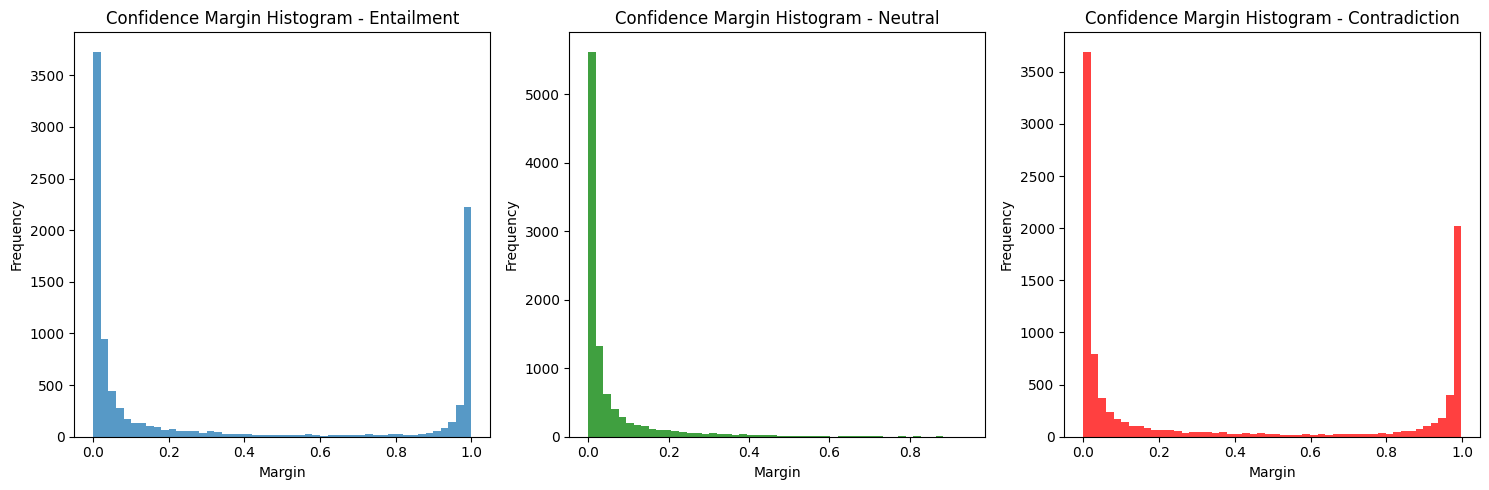

In [27]:
import matplotlib.pyplot as plt

# Plot histograms for the confidence margins
def plot_confidence_margins(df):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.hist(df['confidence_margin_entailment'], bins=50, alpha=0.75, label='Entailment')
    plt.title('Confidence Margin Histogram - Entailment')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 2)
    plt.hist(df['confidence_margin_neutral'], bins=50, alpha=0.75, label='Neutral', color='green')
    plt.title('Confidence Margin Histogram - Neutral')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 3)
    plt.hist(df['confidence_margin_contradiction'], bins=50, alpha=0.75, label='Contradiction', color='red')
    plt.title('Confidence Margin Histogram - Contradiction')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_confidence_margins(combined_snli_df)


In [28]:
# Define thresholds based on the distribution
confidence_threshold = 0.8

# Apply threshold and create a new copy of the DataFrame
high_confidence_snli = combined_snli_df[
    (combined_snli_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_snli_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_snli_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()


# Apply threshold and create a new copy of the DataFrame
high_confidence_mnli_matched = combined_mnli_matched_df[
    (combined_mnli_matched_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_mnli_matched_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_mnli_matched_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Apply threshold and create a new copy of the DataFrame
high_confidence_mnli_mismatched = combined_mnli_mismatched_df[
    (combined_mnli_mismatched_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_mnli_mismatched_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_mnli_mismatched_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 1
high_confidence_anli_r1 = combined_anli_r1_df[
    (combined_anli_r1_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r1_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r1_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 2
high_confidence_anli_r2 = combined_anli_r2_df[
    (combined_anli_r2_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r2_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r2_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 3
high_confidence_anli_r3 = combined_anli_r3_df[
    (combined_anli_r3_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r3_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r3_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

In [29]:
# Majority vote logic with weights for numeric labels
def majority_vote_with_threshold(row):
    votes = [0, 0, 0]  # Index 0 for entailment, 1 for neutral, 2 for contradiction
    if row['confidence_margin_entailment'] >= confidence_threshold:
        votes[0] += row['confidence_margin_entailment']
    if row['confidence_margin_neutral'] >= confidence_threshold:
        votes[1] += row['confidence_margin_neutral']
    if row['confidence_margin_contradiction'] >= confidence_threshold:
        votes[2] += row['confidence_margin_contradiction']
    
    # Return the index of the highest vote
    return np.argmax(votes)

# Apply the majority vote logic using .loc
high_confidence_snli.loc[:, 'majority_vote'] = high_confidence_snli.apply(majority_vote_with_threshold, axis=1)
# Apply the majority vote logic using .loc
high_confidence_mnli_matched.loc[:, 'majority_vote'] = high_confidence_mnli_matched.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_mnli_mismatched.loc[:, 'majority_vote'] = high_confidence_mnli_mismatched.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r1.loc[:, 'majority_vote'] = high_confidence_anli_r1.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r2.loc[:, 'majority_vote'] = high_confidence_anli_r2.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r3.loc[:, 'majority_vote'] = high_confidence_anli_r3.apply(majority_vote_with_threshold, axis=1)


In [30]:
high_confidence_anli_r3

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction,majority_vote
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0,0.047839,0.886640,0.055515,1
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0,0.022308,0.000474,0.969120,2
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0,0.966988,0.505279,0.522189,0
5,0.002461,0.150678,0.846861,0.999220,0.000554,0.000227,0.985221,0.014745,0.000034,0,0.013998,0.135933,0.846635,2
8,0.131793,0.776056,0.092151,0.000384,0.002570,0.997046,0.049409,0.904356,0.046236,0,0.082384,0.128299,0.904895,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,0.957103,0.040533,0.002363,0.000066,0.000316,0.999618,0.009265,0.016116,0.974619,2,0.947838,0.024417,0.024999,0
1194,0.945850,0.052813,0.001337,0.000607,0.000853,0.998540,0.000205,0.000291,0.999504,2,0.945243,0.051960,0.000965,0
1196,0.971834,0.026294,0.001872,0.009070,0.824654,0.166276,0.001115,0.003229,0.995656,2,0.962764,0.798360,0.829379,0
1197,0.973818,0.025074,0.001109,0.000352,0.000972,0.998677,0.310862,0.618914,0.070225,2,0.662956,0.593840,0.928452,2


In [31]:
high_confidence_mnli_mismatched

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction,majority_vote
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2,0.998773,0.003385,0.004211,0
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2,0.991698,0.008714,0.014951,0
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0,0.011021,0.011334,0.992721,2
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2,0.825931,0.525168,0.526413,0
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0,0.009215,0.010844,0.993904,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824,0.000760,0.013837,0.985402,0.972984,0.025382,0.001634,0.925212,0.069991,0.004798,0,0.047772,0.044608,0.980605,2
9825,0.000145,0.003906,0.995949,0.952827,0.045891,0.001281,0.965645,0.032757,0.001598,0,0.012818,0.013134,0.994351,2
9826,0.996226,0.003656,0.000118,0.000353,0.104717,0.894930,0.004991,0.039946,0.955062,2,0.991234,0.064771,0.060132,0
9828,0.997044,0.001226,0.001730,0.000364,0.000717,0.998919,0.019078,0.039258,0.941663,2,0.977966,0.038033,0.057256,0


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf



# Features and Labels
X_snli = high_confidence_snli.drop(['True_Label','majority_vote'], axis=1).values
y_snli = high_confidence_snli['True_Label'].values

# Features and Labels
X_mnli_matched = high_confidence_mnli_matched.drop(['True_Label','majority_vote'], axis=1).values
y_mnli_matched = high_confidence_mnli_matched['True_Label'].values

# Features and Labels
X_mnli_mismatched = high_confidence_mnli_mismatched.drop(['True_Label','majority_vote'], axis=1).values
y_mnli_mismatched = high_confidence_mnli_mismatched['True_Label'].values

# Features and Labels
X_anli_r1 = high_confidence_anli_r1.drop(['True_Label','majority_vote'], axis=1).values
y_anli_r1 = high_confidence_anli_r1['True_Label'].values

# Features and Labels
X_anli_r2 = high_confidence_anli_r2.drop(['True_Label','majority_vote'], axis=1).values
y_anli_r2 = high_confidence_anli_r2['True_Label'].values

# Features and Labels
X_anli_r3 = high_confidence_anli_r3.drop(['True_Label','majority_vote'], axis=1).values
y_anli_r3 = high_confidence_anli_r3['True_Label'].values


2024-04-29 16:57:08.987577: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 16:57:08.987677: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 16:57:09.127279: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [33]:
X_snli

array([[9.98782700e-01, 7.64334340e-04, 4.52971670e-04, ...,
        9.94106161e-01, 5.59870956e-02, 6.04100800e-02],
       [5.04423860e-04, 4.30017000e-03, 9.95195300e-01, ...,
        5.73736000e-03, 5.89017100e-03, 9.94264296e-01],
       [9.89579140e-01, 5.44186770e-03, 4.97903500e-03, ...,
        9.04028705e-01, 1.89172950e-02, 3.66324000e-02],
       ...,
       [7.03768750e-04, 9.79310100e-03, 9.89503150e-01, ...,
        1.13691360e-01, 1.12957690e-01, 9.87502096e-01],
       [9.99171140e-01, 4.92864300e-04, 3.36036580e-04, ...,
        9.98333621e-01, 1.90469200e-03, 2.68793000e-03],
       [2.66645200e-04, 2.17778240e-03, 9.97555600e-01, ...,
        9.45200000e-04, 6.61004000e-04, 9.96841898e-01]])

In [34]:
from sklearn.model_selection import train_test_split

def prepare_data_splits(X, y, test_size=0.1, random_state=42):
    # Split the data for the inputs
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y)

    return X_train, X_val , y_train, y_val

# Example for SNLI data
X_train_snli, X_val_snli, y_train_snli, y_val_snli = prepare_data_splits(X_snli, y_snli)
# Example for MNLI-m data
X_train_mnli_matched, X_val_mnli_matched, y_train_mnli_matched, y_val_mnli_matched = prepare_data_splits(X_mnli_matched, y_mnli_matched)
# Example for MNLI-mm data
X_train_mnli_mismatched, X_val_mnli_mismatched,  y_train_mnli_mismatched, y_val_mnli_mismatched = prepare_data_splits(X_mnli_mismatched,  y_mnli_mismatched)
# Example for ANLI round 1 data
X_train_anli_r1, X_val_anli_r1, y_train_anli_r1, y_val_anli_r1 = prepare_data_splits(X_anli_r1,  y_anli_r1)
# Example for ANLI round 2 data
X_train_anli_r2, X_val_anli_r2, y_train_anli_r2, y_val_anli_r2 = prepare_data_splits(X_anli_r2, y_anli_r2)
# Example for ANLI round 3 data
X_train_anli_r3, X_val_anli_r3,y_train_anli_r3, y_val_anli_r3 = prepare_data_splits(X_anli_r3,  y_anli_r3)


In [35]:
X_train_mnli_mismatched.shape

(5319, 12)

In [36]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_snli = scaler.fit_transform(X_train_snli)
X_val_snli = scaler.transform(X_val_snli)
X_train_mnli_matched = scaler.fit_transform(X_train_mnli_matched)
X_val_mnli_matched = scaler.transform(X_val_mnli_matched)
X_train_mnli_mismatched = scaler.fit_transform(X_train_mnli_mismatched)
X_val_mnli_mismatched = scaler.transform(X_val_mnli_mismatched)
X_train_anli_r1 = scaler.fit_transform(X_train_anli_r1)
X_val_mnli_anli_r1 = scaler.transform(X_val_anli_r1)
X_train_anli_r2 = scaler.fit_transform(X_train_anli_r2)
X_val_mnli_anli_r2 = scaler.transform(X_val_anli_r2)
X_train_anli_r3 = scaler.fit_transform(X_train_anli_r3)
X_val_mnli_anli_r3 = scaler.transform(X_val_anli_r3)

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Entailment', 'Neutral', 'Contradiction'], yticklabels=['Entailment', 'Neutral', 'Contradiction'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

Accuracy on Validation Data SNLI: 0.9552980132450332
Validation loss SNLI: 0.10213037838759571
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       291
           1       0.56      0.19      0.29        26
           2       0.96      0.99      0.97       287

    accuracy                           0.96       604
   macro avg       0.83      0.72      0.75       604
weighted avg       0.94      0.96      0.95       604



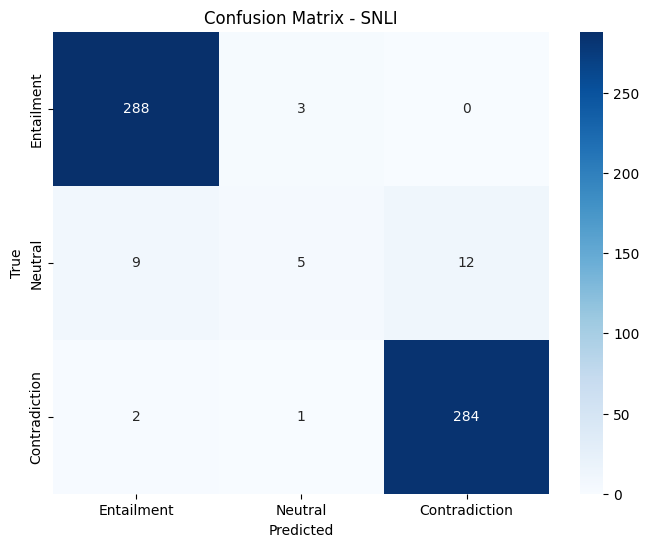

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, hinge_loss

# Modified function to build, train, and evaluate the SVC model
def build_train_evaluate_svc(X_train, y_train, X_val, y_val, name, C=1.0, kernel='linear', gamma='scale'):
    # Initialize the SVM classifier with provided hyperparameters
    svc = SVC(C=C, kernel=kernel, gamma=gamma, random_state=42, probability=True)
    
    # Train the SVM model
    svc.fit(X_train, y_train)
    
    # Make predictions
    y_pred = svc.predict(X_val)

    # Calculate the validation accuracy
    accuracy = accuracy_score(y_val, y_pred)
    
    # Calculate the hinge loss
    # Using decision_function to get raw SVM outputs and calculating the loss
    raw_predictions = svc.decision_function(X_val)
    val_loss = hinge_loss(y_val, raw_predictions)
    
    # Display evaluation metrics
    print(f"Accuracy on Validation Data {name}: {accuracy}")
    print(f"Validation loss {name}: {val_loss}")
    print(classification_report(y_val, y_pred))
    
    # Return the SVC model, validation accuracy, and validation loss
    return svc, accuracy, val_loss


# Train the model and get validation metrics
model_snli, val_accuracy_snli, val_loss_snli = build_train_evaluate_svc(
    X_train_snli, y_train_snli, X_val_snli, y_val_snli, 'SNLI', C=20, kernel='linear'
)
# Plotting confusion matrix
y_pred_snli = model_snli.predict(X_val_snli)
plot_confusion_matrix(y_val_snli, y_pred_snli, 'SNLI')

Accuracy on Validation Data MNLI Matched: 0.962457337883959
Validation loss MNLI Matched: 0.08666831042207106
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       284
           1       0.00      0.00      0.00        18
           2       0.95      1.00      0.97       284

    accuracy                           0.96       586
   macro avg       0.64      0.66      0.65       586
weighted avg       0.93      0.96      0.95       586



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


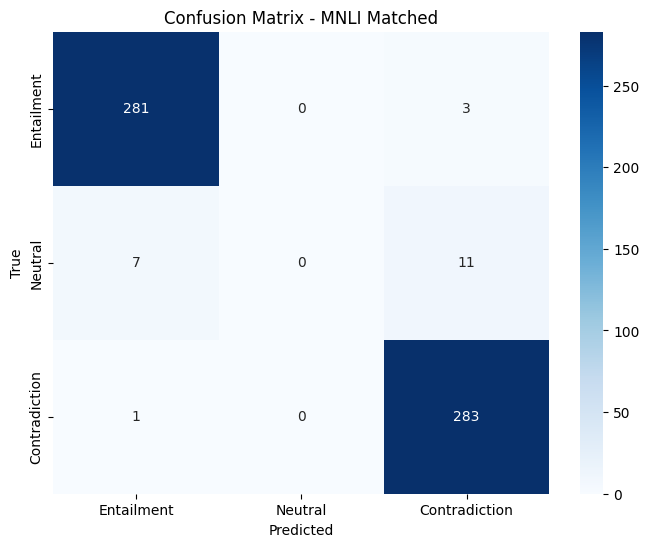

In [39]:
# For MNLI Matched data
model_mnli_matched, val_accuracy_mnli_matched, val_loss_mnli_matched = build_train_evaluate_svc(
    X_train_mnli_matched, y_train_mnli_matched, X_val_mnli_matched, y_val_mnli_matched, 'MNLI Matched', C=20, kernel='linear'
)
y_pred_mnli_matched = model_mnli_matched.predict(X_val_mnli_matched)
plot_confusion_matrix(y_val_mnli_matched, y_pred_mnli_matched, 'MNLI Matched')



Accuracy on Validation Data MNLI Mismatched: 0.9661590524534687
Validation loss MNLI Mismatched: 0.07669981997860932
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       289
           1       0.00      0.00      0.00        19
           2       0.98      1.00      0.99       283

    accuracy                           0.97       591
   macro avg       0.64      0.67      0.65       591
weighted avg       0.94      0.97      0.95       591



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


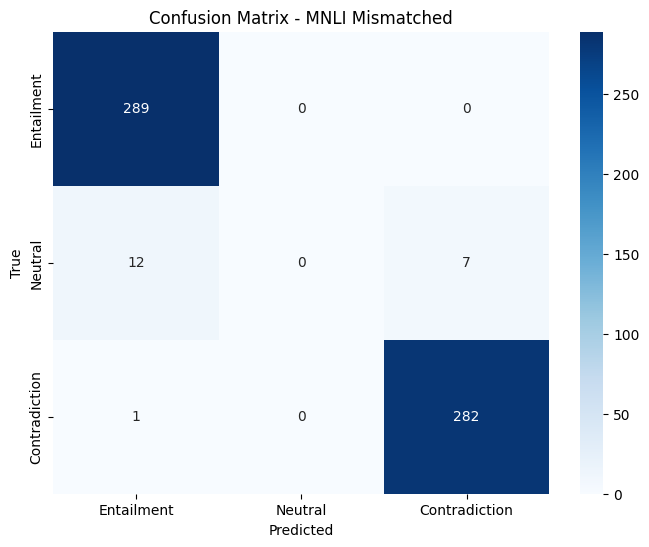

In [40]:
# For MNLI Mismatched data
model_mnli_mismatched, val_accuracy_mnli_mismatched, val_loss_mnli_mismatched = build_train_evaluate_svc(
    X_train_mnli_mismatched, y_train_mnli_mismatched, X_val_mnli_mismatched, y_val_mnli_mismatched, 'MNLI Mismatched', C=20, kernel='linear'
)
y_pred_mnli_mismatched = model_mnli_mismatched.predict(X_val_mnli_mismatched)
plot_confusion_matrix(y_val_mnli_mismatched, y_pred_mnli_mismatched, 'MNLI Mismatched')


Accuracy on Validation Data ANLI Round 1: 0.7441860465116279
Validation loss ANLI Round 1: 0.6536322258746629
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       1.00      0.10      0.18        10
           2       0.72      0.95      0.82        19

    accuracy                           0.74        43
   macro avg       0.83      0.66      0.61        43
weighted avg       0.80      0.74      0.68        43



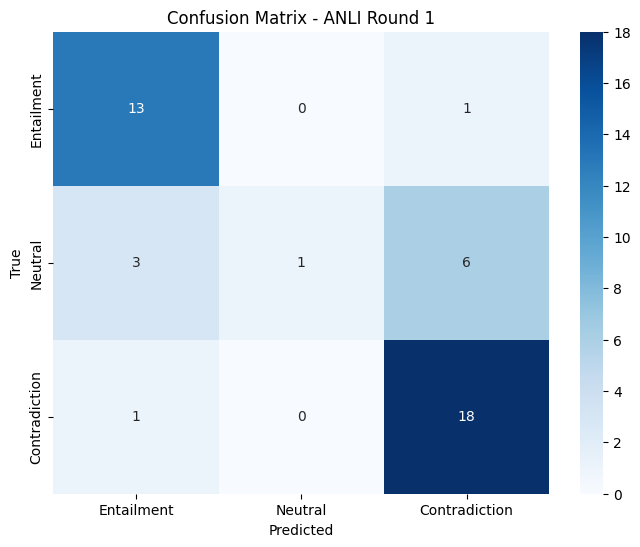

In [41]:
# For ANLI Round 1 data
model_anli_r1, val_accuracy_anli_r1, val_loss_anli_r1 = build_train_evaluate_svc(
    X_train_anli_r1, y_train_anli_r1, X_val_anli_r1, y_val_anli_r1, 'ANLI Round 1', C=20, kernel='linear'
)
y_pred_anli_r1 = model_anli_r1.predict(X_val_anli_r1)
plot_confusion_matrix(y_val_anli_r1, y_pred_anli_r1, 'ANLI Round 1')


Accuracy on Validation Data ANLI Round 2: 0.6888888888888889
Validation loss ANLI Round 2: 0.7448256715052364
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       1.00      0.18      0.31        11
           2       0.61      0.89      0.72        19

    accuracy                           0.69        45
   macro avg       0.80      0.63      0.61        45
weighted avg       0.77      0.69      0.65        45



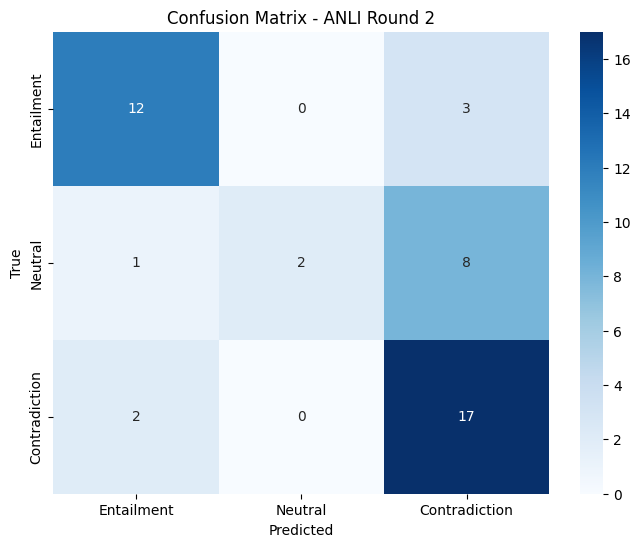

In [42]:
# For ANLI Round 2 data
model_anli_r2, val_accuracy_anli_r2, val_loss_anli_r2 = build_train_evaluate_svc(
    X_train_anli_r2, y_train_anli_r2, X_val_anli_r2, y_val_anli_r2, 'ANLI Round 2', C=20, kernel='linear'
)
y_pred_anli_r2 = model_anli_r2.predict(X_val_anli_r2)
plot_confusion_matrix(y_val_anli_r2, y_pred_anli_r2, 'ANLI Round 2')

Accuracy on Validation Data ANLI Round 3: 0.4528301886792453
Validation loss ANLI Round 3: 1.3346447639671764
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        14
           2       0.45      1.00      0.62        24

    accuracy                           0.45        53
   macro avg       0.15      0.33      0.21        53
weighted avg       0.21      0.45      0.28        53



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


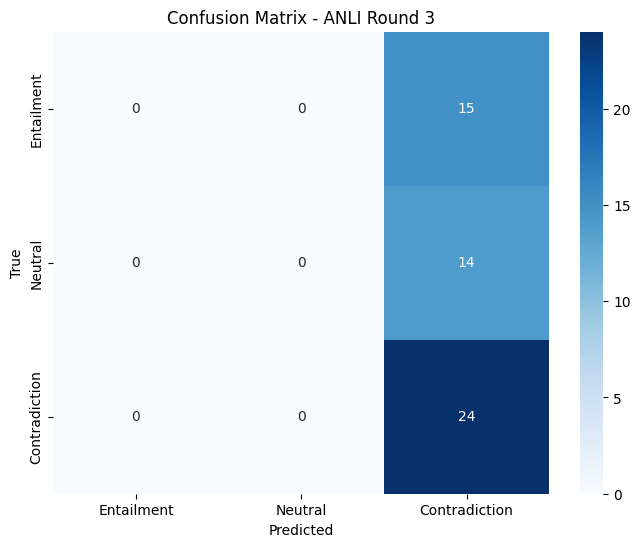

In [43]:
# For ANLI Round 3 data
model_anli_r3, val_accuracy_anli_r3, val_loss_anli_r3 = build_train_evaluate_svc(
    X_train_anli_r3, y_train_anli_r3, X_val_anli_r3, y_val_anli_r3, 'ANLI Round 3', C=20, kernel='linear'
)
y_pred_anli_r3 = model_anli_r3.predict(X_val_anli_r3)
plot_confusion_matrix(y_val_anli_r3, y_pred_anli_r3, 'ANLI Round 3')

Accuracy on Validation Data Combined tasks: 0.9432291666666667
Validation loss Combined tasks: 0.1344111899578611
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       907
           1       0.67      0.14      0.24        97
           2       0.96      0.98      0.97       916

    accuracy                           0.94      1920
   macro avg       0.85      0.71      0.72      1920
weighted avg       0.93      0.94      0.93      1920



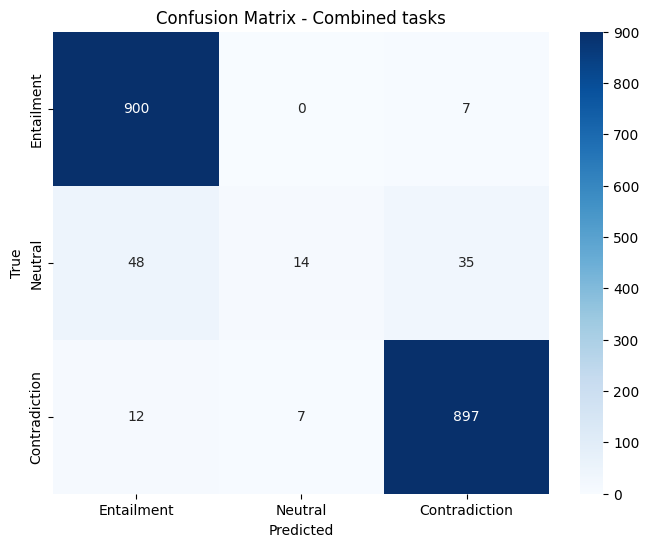

In [44]:
# Combining all datasets for a comprehensive training set
X_all_tasks = np.concatenate([
    X_snli, X_mnli_matched, X_mnli_mismatched,
    X_anli_r1, X_anli_r2, X_anli_r3
])



y_all_tasks = np.concatenate([
    y_snli, y_mnli_matched, y_mnli_mismatched,
    y_anli_r1, y_anli_r2, y_anli_r3
])

# Prepare data splits for combined dataset
X_train_all, X_val_all, y_train_all, y_val_all = prepare_data_splits(
    X_all_tasks,  y_all_tasks
)



# For all data
model_anli_all, val_accuracy_all, val_loss_all = build_train_evaluate_svc(
    X_train_all, y_train_all, X_val_all, y_val_all, 'Combined tasks', C=20, kernel='linear'
)
# Generate predictions for the validation set
y_pred_all = model_anli_all.predict(X_val_all)

# Plot the confusion matrix
plot_confusion_matrix(y_val_all, y_pred_all, 'Combined tasks')


In [46]:
from joblib import dump, load

# After training the SVC model, you save it like this:
dump(model_all, 'SVC_feature_ensemble.joblib')


['SVC_feature_ensemble.joblib']

In [47]:
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import joblib  # For model persistence


# Function to build, train, and evaluate the SVM model
def train_and_evaluate_svc(X_train, y_train, X_val, y_val, name):
    # Setting up the pipeline for scaling and classification
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(random_state=42))
    ])
    
    # Parameter grid for GridSearchCV
    param_grid = {
        'svc__C': [0.1, 1, 10],
        'svc__kernel': ['linear', 'rbf'],
        'svc__gamma': ['scale', 'auto']
    }
    
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Best estimator
    best_model = grid_search.best_estimator_
    
    
    # Predictions and evaluation
    y_pred = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy on Validation Data {name}: {accuracy}")
    print(classification_report(y_val, y_pred))
    
    return best_model, grid_search



# Train and evaluate
model_snli_svc, grid_search_snli = train_and_evaluate_svc(X_train_snli, y_train_snli, X_val_snli, y_val_snli, 'SNLI')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy on Validation Data SNLI: 0.9503311258278145
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       291
           1       0.42      0.19      0.26        26
           2       0.96      0.99      0.97       287

    accuracy                           0.95       604
   macro avg       0.78      0.72      0.74       604
weighted avg       0.94      0.95      0.94       604



In [48]:
# Train and evaluate
model_mnli_matched_svc, grid_search_mnli_matched = train_and_evaluate_svc(X_train_mnli_matched, y_train_mnli_matched, X_val_mnli_matched, y_val_mnli_matched, 'MNLI-m')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy on Validation Data MNLI-m: 0.9641638225255973
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       284
           1       0.00      0.00      0.00        18
           2       0.95      1.00      0.98       284

    accuracy                           0.96       586
   macro avg       0.64      0.66      0.65       586
weighted avg       0.93      0.96      0.95       586



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
# Train and evaluate
model_mnli_mismatched_svc, grid_search_mnli_mismatched = train_and_evaluate_svc(X_train_mnli_mismatched, y_train_mnli_mismatched, X_val_mnli_mismatched, y_val_mnli_mismatched, 'MNLI-mm')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy on Validation Data MNLI-mm: 0.9661590524534687
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       289
           1       0.00      0.00      0.00        19
           2       0.98      1.00      0.99       283

    accuracy                           0.97       591
   macro avg       0.64      0.67      0.65       591
weighted avg       0.94      0.97      0.95       591



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
# Train and evaluate
model_anli_r1_svc, grid_search_anli_r1 = train_and_evaluate_svc(X_train_anli_r1, y_train_anli_r1, X_val_anli_r1, y_val_anli_r1, 'ANLI round 1')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy on Validation Data ANLI round 1: 0.7441860465116279
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       1.00      0.10      0.18        10
           2       0.72      0.95      0.82        19

    accuracy                           0.74        43
   macro avg       0.83      0.66      0.61        43
weighted avg       0.80      0.74      0.68        43



In [51]:
# Train and evaluate
model_anli_r2_svc, grid_search_anli_r2 = train_and_evaluate_svc(X_train_anli_r2, y_train_anli_r2, X_val_anli_r2, y_val_anli_r2, 'ANLI round 2')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy on Validation Data ANLI round 2: 0.6888888888888889
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       1.00      0.27      0.43        11
           2       0.61      0.89      0.72        19

    accuracy                           0.69        45
   macro avg       0.80      0.63      0.64        45
weighted avg       0.76      0.69      0.66        45



In [52]:
# Train and evaluate
model_anli_r3_svc, grid_search_anli_r3 = train_and_evaluate_svc(X_train_anli_r3, y_train_anli_r3, X_val_anli_r3, y_val_anli_r3, 'ANLI round 3')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy on Validation Data ANLI round 3: 0.4528301886792453
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        14
           2       0.45      1.00      0.62        24

    accuracy                           0.45        53
   macro avg       0.15      0.33      0.21        53
weighted avg       0.21      0.45      0.28        53



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
